In [1]:
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import pymc3 as pm
itemnum = 1000
with pm.Model() as model:
    p1 = pm.Normal('normal', 0.0, 1.0)
    p2 = pm.Poisson('poisson', mu = 1.5)
    start = pm.find_MAP()
    step = pm.NUTS(state = start)
    trace = pm.sample(itemnum, step, start, njobs = 4)

Optimization terminated successfully.
         Current function value: 2.013473
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


100%|██████████| 1000/1000 [00:03<00:00, 324.44it/s]


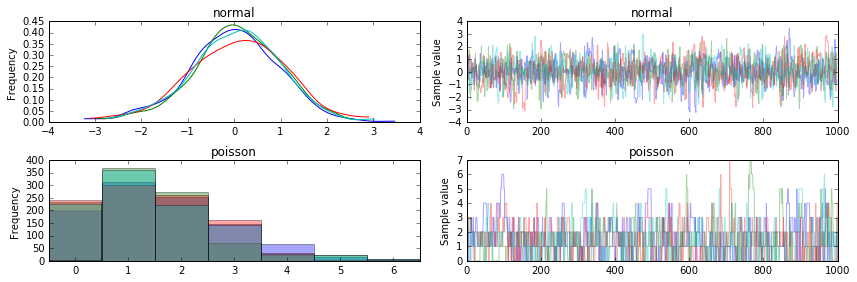

In [2]:
with model:
    pm.traceplot(trace)

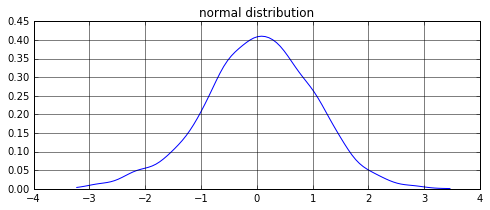

In [3]:
# probability density function
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
d = trace['normal']
kde = gaussian_kde(d)
x = np.linspace(min(d), max(d), 100)
plt.rcParams["figure.figsize"] = (8,3)
plt.title('normal distribution')
plt.grid(which='major',color='black',linestyle='-')
plt.plot(x, kde(x))
plt.show()

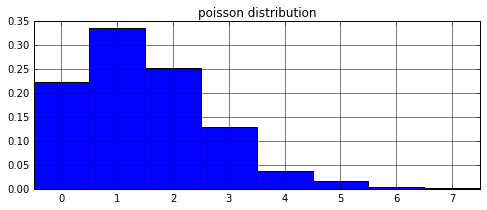

In [4]:
# probability mass function
#from scipy.stats import histogram
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def generate_pmf(d):
    hist = np.histogram(d, max(d) - min(d) + 1)
    return (lambda x: (hist[0] / d.size)[x - min(d)])
d = trace['poisson']
pmf = generate_pmf(d)
x = np.arange(min(d), max(d) + 1)
plt.rcParams["figure.figsize"] = (8,3)
plt.title('poisson distribution')
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(which='major',color='black',linestyle='-')
plt.xlim(x[0] - 0.5, x[-1] + 0.5)
plt.bar(x - 0.5, pmf(x), width=1.0)
plt.show()